In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/richi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/richi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/richi/nltk_data...


True

**Ejercicios de análisis de sentimiento y textos.**

### Objetivos 
* Realizar minería de textos. 
* Interpretación de los textos
* Análisis de los resultados.

# Ejercicio 1

Agarre un texto en inglés que quiera, y calcule la frecuencia de sus palabras.


# Solución

## 1.1 EDA

1. Leer texto del file.txt

In [11]:
text_file=open('file.txt','r')
text=text_file.read()
print(text)

One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters K. Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of K. Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram.



In [12]:
freq = Counter(text.split()).most_common()
#freq = Counter(text.split())
print(freq)

[('of', 4), ('clustering', 4), ('that', 3), ('an', 3), ('K-means', 2), ('is', 2), ('it', 2), ('to', 2), ('the', 2), ('K.', 2), ('Hierarchical', 2), ('a', 2), ('in', 2), ('One', 1), ('potential', 1), ('disadvantage', 1), ('requires', 1), ('us', 1), ('pre-specify', 1), ('number', 1), ('clusters', 1), ('alternative', 1), ('approach', 1), ('which', 1), ('does', 1), ('not', 1), ('require', 1), ('we', 1), ('commit', 1), ('particular', 1), ('choice', 1), ('has', 1), ('added', 1), ('advantage', 1), ('over', 1), ('results', 1), ('attractive', 1), ('tree-based', 1), ('representation', 1), ('observations,', 1), ('called', 1), ('dendrogram.', 1)]


2. Graficar las frecuencia de las palabras.

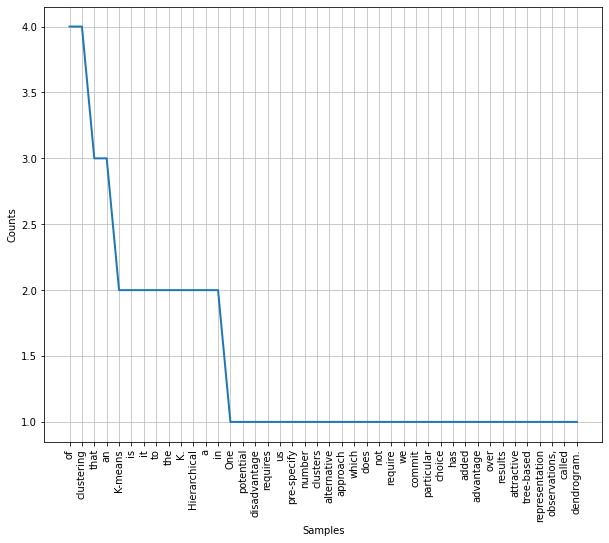

In [13]:
fdistribution = nltk.FreqDist(text.split())
f=plt.figure(figsize=(10,8))
fdistribution.plot()
plt.show()

# Ejercicio 2

Extraiga las **stopwords** y realice **stemming** en su conjunto de datos.

## 2.1  Eliminación de palabras vacías (stopwords)

Cuando trabajamos con palabras, sobre todo si tenemos en cuenta su semántica, a veces necesitamos excluir algunas palabras muy frecuentes que no aportan ningún significado sustancial a una frase, palabras como pero, podemos, nosotros, etc. Esta técnica explica cómo hacerlo.

# Solución

1. Introduzca la lista de palabras vacías de NLTK:

In [16]:
stoplist = stopwords.words('english')
print(len(stoplist))
list(stoplist)[:10]

179


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#### Información

Esta es la lista de idiomas que NLTK admite para las palabras vacías: Arabic, Azerbaijani, Danish, Dutch, English, Finnish, French, German, Greek, Hungarian, Italian, Kazakh, Nepali, Norwegian, Portuguese, Romanian, Russian, Spanish, Swedish, y Turkish.

2. Dividir las frases en palabras - tokenización

In [17]:
cleanwordlist = nltk.tokenize.word_tokenize(text)

3. Eliminar las palabras vacías:

In [18]:
cleanwordlist = [word for word in text.split() if word not in stoplist]

4. El resultado será el siguiente:

In [20]:
print(cleanwordlist)

['One', 'potential', 'disadvantage', 'K-means', 'clustering', 'requires', 'us', 'pre-specify', 'number', 'clusters', 'K.', 'Hierarchical', 'clustering', 'alternative', 'approach', 'require', 'commit', 'particular', 'choice', 'K.', 'Hierarchical', 'clustering', 'added', 'advantage', 'K-means', 'clustering', 'results', 'attractive', 'tree-based', 'representation', 'observations,', 'called', 'dendrogram.']


In [21]:
fd = nltk.FreqDist(cleanwordlist)
fd.most_common(10)

[('clustering', 4),
 ('K-means', 2),
 ('K.', 2),
 ('Hierarchical', 2),
 ('One', 1),
 ('potential', 1),
 ('disadvantage', 1),
 ('requires', 1),
 ('us', 1),
 ('pre-specify', 1)]

# 2.2 Separación de palabras (stemming)

En algunas tareas de NLP es necesario separar las palabras, es decir, eliminar los sufijos y terminaciones como -ing and -ed. Esta técnica explica cómo hacerlo.

In [47]:
print(text)

One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters K. Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of K. Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram.



1. Inicializamos el objeto **stemmer** con el inglés como lengua de entrada.

In [67]:
stemmer = SnowballStemmer('english')

2. Creamos una lista con las palabras que queremos acortar. 

In [51]:
words = ['clustering', 'requires', 'results', 'representation','Hierarchical', 'called']

3. Creamos una lista con las palabras acortadas.

In [59]:
stemmed_words = [stemmer.stem(word) for word in words]
print(stemmed_words)

['cluster', 'requir', 'result', 'represent', 'hierarch', 'call']


## 2.3 Además...

El NLTK Snowball Stemmer tiene algoritmos para varios idiomas. Para ver todos los idiomas que utiliza el NLTK Snowball Stemmer, utilice este comando:

In [54]:
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


# Ejercicio 3
Realice análisis de sentimiento en su conjunto de datos.

## 3.1 Análisis de sentimientos

El análisis sentimental es un nuevo campo de investigación que se ha desarrollado muy recientemente con el fin de evaluar las opiniones de las personas sobre un tema concreto. Esta disciplina se basa en diferentes técnicas que utilizan el análisis de textos y su campo de trabajo en el mundo de las redes sociales y los foros (minería de opiniones).

En esta técnica, utilizaremos dos herramientas sencillas para etiquetar una frase como de sentimiento positivo o negativo. La primera herramienta es el analizador de sentimiento NLTK Vader, y la segunda utiliza el paquete textblob.

# Solución

In [7]:
vader = SentimentIntensityAnalyzer()

In [8]:
def get_sentiment(text):
    return vader.polarity_scores(text.lower())['compound']
#vader.polarity_scores(text)

In [9]:
get_sentiment(text)

0.5574

In [10]:
vader.polarity_scores(text)

{'neg': 0.043, 'neu': 0.828, 'pos': 0.129, 'compound': 0.5574}